In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('./titanic_train.csv', index_col='PassengerId')
print(df.shape)
df.head(2)

(891, 11)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   

             SibSp  Parch     Ticket     Fare Cabin Embarked  
PassengerId                                                   
1                1      0  A/5 21171   7.2500   NaN        S  
2                1      0   PC 17599  71.2833   C85        C

In [3]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

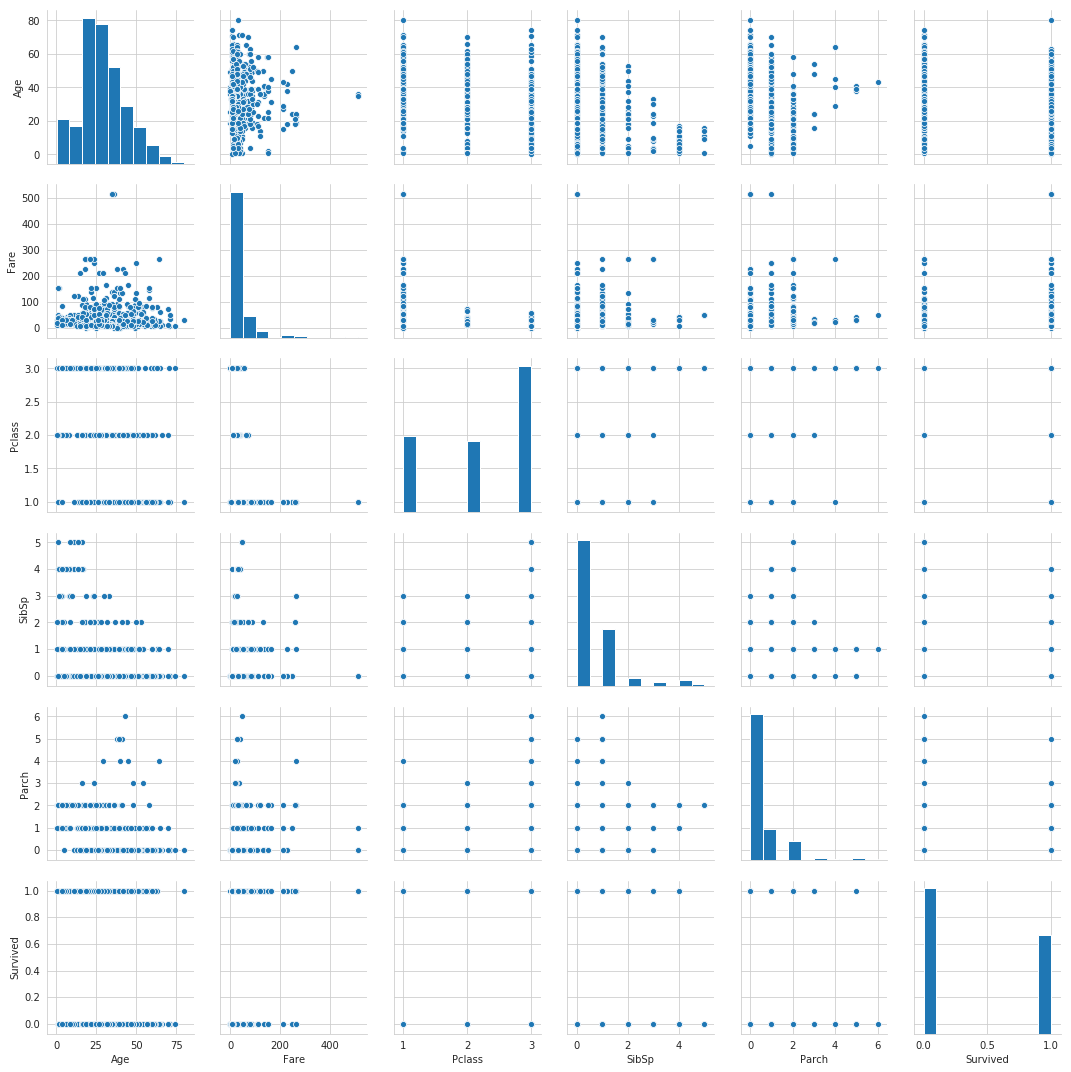

In [4]:
feat = [
    'Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 
    'Parch', 'Embarked', 'Survived'
]
sns.pairplot(df[feat]);

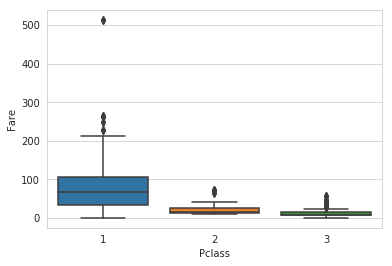

In [5]:
sns.boxplot(x='Pclass', y='Fare', data=df);

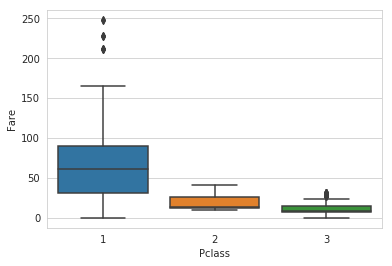

In [6]:
pclass_min = dict((df.groupby('Pclass')['Fare'].mean() - 2*df.groupby('Pclass')['Fare'].std()).items())
pclass_max = dict((df.groupby('Pclass')['Fare'].mean() + 2*df.groupby('Pclass')['Fare'].std()).items())
pclass1 = df[
    (df['Pclass'] == 1) & (df['Fare'] >= pclass_min[1]) & (df['Fare'] <= pclass_max[1])
]
pclass2 = df[
    (df['Pclass'] == 2) & (df['Fare'] >= pclass_min[2]) & (df['Fare'] <= pclass_max[2])
]
pclass3 = df[
    (df['Pclass'] == 3) & (df['Fare'] >= pclass_min[3]) & (df['Fare'] <= pclass_max[3])
]
df2 = pclass1.append(pclass2).append(pclass3)
sns.boxplot(x='Pclass', y='Fare', data=df2);

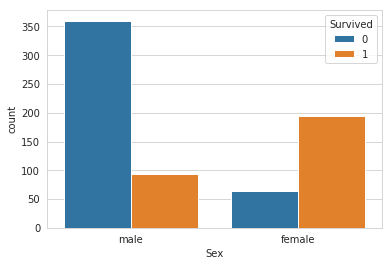

In [7]:
sns.countplot(x='Sex', hue='Survived', data=df);

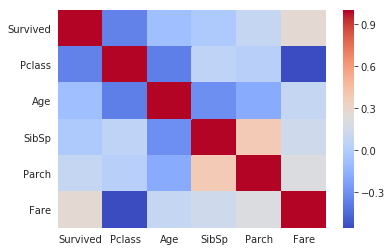

In [8]:
sns.heatmap(df.corr(), cmap='coolwarm');

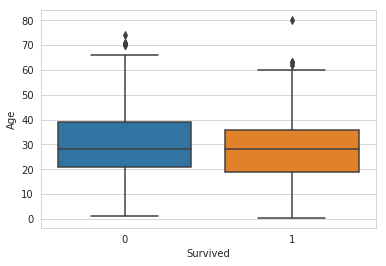

In [9]:
sns.boxplot(x='Survived', y='Age', data=df);

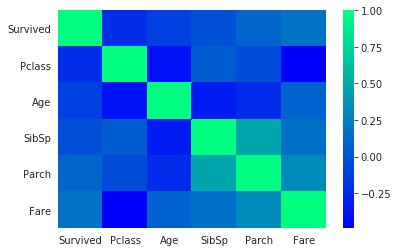

In [75]:
df2 = df[(df['Age'] < 30) | (df['Age'] > 60)].copy()
#sns.heatmap(df2.corr(), cmap='tab10');
sns.heatmap(df[df['Sex'] == 'male'].corr(), cmap='winter');

In [92]:
for i in dir(sns):
    if 'plot' in i:
        print(i)

barplot
boxenplot
boxplot
catplot
countplot
distplot
dogplot
factorplot
jointplot
kdeplot
lineplot
lmplot
lvplot
miscplot
pairplot
palplot
plotting_context
pointplot
regplot
relplot
residplot
rugplot
scatterplot
stripplot
swarmplot
tsplot
violinplot


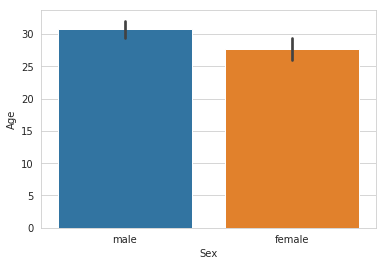

In [120]:
sns.barplot(df.Sex, df.Age);

In [128]:
pd.crosstab(columns=['Age', 'Pclass'], index=1)

ValueError: If using all scalar values, you must pass an index